In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [0]:
DATA_DIR = '/content/Live.csv'

In [0]:
df = pd.read_csv(DATA_DIR)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# **Pré-processamento**

In [0]:
#colunas vazias
df = df.drop(columns=["Column1", "Column2", 'Column3', 'Column4'])
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0


In [0]:
#mapa de correlação
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') 

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1,0.172492,0.82,0.407628,0.399826,0.19997,0.312513
num_likes,0.994923,0.101687,0.172492,1,0.209308,0.2078,0.120784,0.0521688,0.0874307
num_loves,0.305003,0.521223,0.82,0.209308,1,0.508798,0.50783,0.2076,0.371001
num_wows,0.267752,0.162394,0.407628,0.2078,0.508798,1,0.287756,0.0865027,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.50783,0.287756,1,0.141421,0.21191
num_sads,0.075138,0.236453,0.19997,0.0521688,0.2076,0.0865027,0.141421,1,0.142072
num_angrys,0.124326,0.225184,0.312513,0.0874307,0.371001,0.183087,0.21191,0.142072,1


In [0]:
#retirando num_reactions pois, tem alta correlação com num_likes
df = df.drop(columns=["num_reactions"]) 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_comments,1,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.640637,1,0.172492,0.82,0.407628,0.399826,0.19997,0.312513
num_likes,0.101687,0.172492,1,0.209308,0.2078,0.120784,0.0521688,0.0874307
num_loves,0.521223,0.82,0.209308,1,0.508798,0.50783,0.2076,0.371001
num_wows,0.162394,0.407628,0.2078,0.508798,1,0.287756,0.0865027,0.183087
num_hahas,0.325048,0.399826,0.120784,0.50783,0.287756,1,0.141421,0.21191
num_sads,0.236453,0.19997,0.0521688,0.2076,0.0865027,0.141421,1,0.142072
num_angrys,0.225184,0.312513,0.0874307,0.371001,0.183087,0.21191,0.142072,1


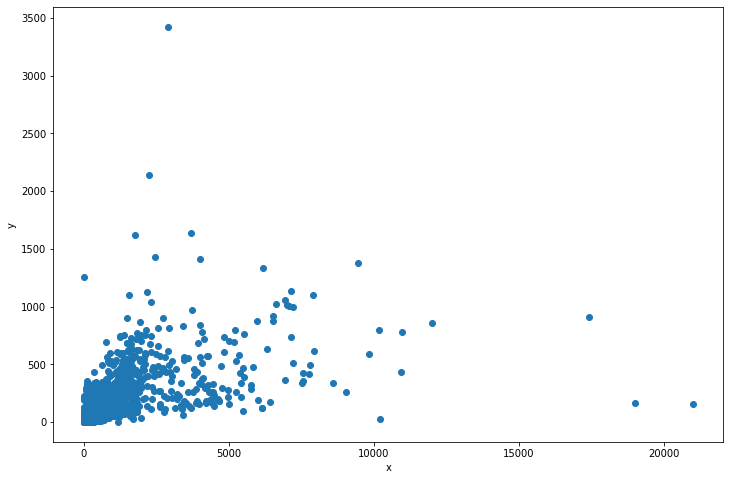

In [0]:
#visualizar os outliers
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df['num_comments'], df['num_shares']) #colocar de 2 em 2
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [0]:
#transformar atributos qualitativos em quantitativos
le = preprocessing.LabelEncoder() 
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = le.fit_transform(df[column])

#transforma atributos em float        
for col in  df.columns[0:11]: 
    df[col] = df[col].astype(float)

print(df)

      status_id  status_type  status_published  ...  num_hahas  num_sads  num_angrys
0        2831.0          3.0            3949.0  ...        1.0       1.0         0.0
1        2830.0          1.0            3917.0  ...        0.0       0.0         0.0
2        2829.0          3.0            3921.0  ...        1.0       0.0         0.0
3        2828.0          1.0            3920.0  ...        0.0       0.0         0.0
4        2827.0          1.0            3832.0  ...        0.0       0.0         0.0
...         ...          ...               ...  ...        ...       ...         ...
7045        4.0          1.0            6691.0  ...        0.0       0.0         0.0
7046        3.0          1.0            6676.0  ...        1.0       0.0         0.0
7047        2.0          1.0            6643.0  ...        0.0       0.0         0.0
7048        1.0          1.0            6625.0  ...        0.0       0.0         0.0
7049        0.0          1.0            6463.0  ...        0.0   

In [0]:
X = df.iloc[:, 0:11]

# **K-means**

In [0]:
#K-MEANS
results = pd.DataFrame() #dataframe para colocar os indices de clusters
for k in range(1,12): #for com o numero maximo de objetos (12) 
  kmeans = KMeans(n_clusters=k, random_state=True).fit(X)#Calcula os k-means clusters com resultados aleatorios
  X_clustered = kmeans.fit_predict(X) #Calcula os centros de cluster e preve o índice de cluster para cada objeto.
  results['Cluster', k-1] = X_clustered

In [0]:
results

,"(Cluster, 0)","(Cluster, 1)","(Cluster, 2)","(Cluster, 3)","(Cluster, 4)","(Cluster, 5)","(Cluster, 6)","(Cluster, 7)","(Cluster, 8)","(Cluster, 9)","(Cluster, 10)"
0,0,0,0,0,0,0,4,2,4,2,2
1,0,0,0,0,0,0,4,2,4,2,2
2,0,0,0,0,0,0,4,2,4,2,2
3,0,0,0,0,0,0,4,2,4,2,2
4,0,0,0,0,0,0,4,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...
7045,0,0,0,0,0,2,2,6,3,6,6
7046,0,0,0,0,0,2,2,6,3,6,6
7047,0,0,0,0,0,2,2,6,3,6,6
7048,0,0,0,0,0,2,2,6,3,6,6


In [0]:
#printando os indices de cada k
for i in range(0, 11):
  print("\n", results[('Cluster', i)].value_counts())


 0    7050
Name: (Cluster, 0), dtype: int64

 1    3583
0    3467
Name: (Cluster, 1), dtype: int64

 2    2862
0    2184
1    2004
Name: (Cluster, 2), dtype: int64

 0    1927
1    1882
2    1761
3    1480
Name: (Cluster, 3), dtype: int64

 1    1881
0    1847
2    1756
3    1441
4     125
Name: (Cluster, 4), dtype: int64

 1    1774
3    1487
0    1088
5    1058
4     931
2     712
Name: (Cluster, 5), dtype: int64

 3    1670
1    1444
4    1088
5    1020
0    1016
2     700
6     112
Name: (Cluster, 6), dtype: int64

 1    1289
0    1077
2    1074
4    1025
7     963
5     900
6     610
3     112
Name: (Cluster, 7), dtype: int64

 5    1173
6    1133
0    1016
4     984
2     747
8     666
1     628
3     594
7     109
Name: (Cluster, 8), dtype: int64

 7    1168
4    1154
2     981
0     882
9     743
5     665
6     593
1     576
8     178
3     110
Name: (Cluster, 9), dtype: int64

 7     1168
4     1154
2      962
0      883
9      740
5      663
6      578
1      576
8      178

# **Hierárquico complete**

In [0]:
#AGRUPAMENTO HIERARQUICO COMPLETE
#o melhor cluster foi 4, oq melhor se distribuiu

clustering = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X) 
labels = clustering.labels_

In [0]:
#Calculando a soma de cada cluster
labels_complete = pd.DataFrame(labels)
labels_complete.rename(columns={0:'Indices'}, inplace=True)
labels_complete['Indices'].value_counts()

1    3560
2    3426
0      61
3       3
Name: Indices, dtype: int64

# **Hierárquico single**

In [0]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='single').fit(X) 
labels_single = clustering.labels_

In [0]:
labels_single = pd.DataFrame(labels_single)
labels_single.rename(columns={0:'Indices'}, inplace=True)
labels_single['Indices'].value_counts()

0    7046
1       2
3       1
2       1
Name: Indices, dtype: int64

# **Plot hierárquico**

In [0]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# **Plot single**

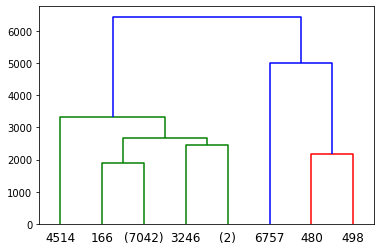

In [0]:
from scipy.cluster.hierarchy import dendrogram

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
model = model.fit(X)
labels_single1 = model.labels_
plot_dendrogram(model, truncate_mode='level', p=3)

# **Plot complete**

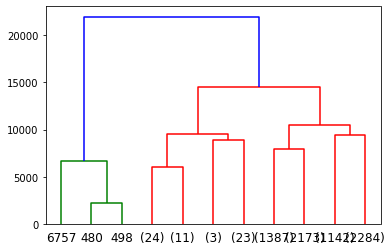

In [0]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model = model.fit(X)
labels = model.labels_
plot_dendrogram(model, truncate_mode='level', p=3)